## Edges and Gradient

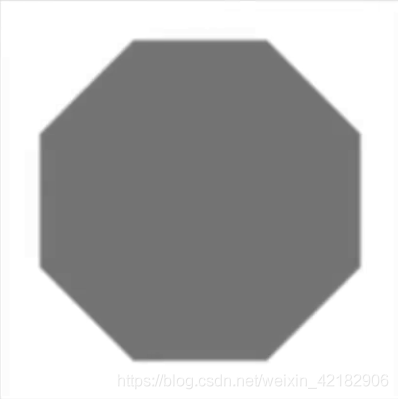

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('/content/drive/MyDrive/media/octagon.png')
cv2_imshow(img)

Edge detection requires the use of partial dervietes at the direction we want to detect said edges.
If we would do a partial derivative at the X direction, we would see change  as it happens in the X direction, and same for Y.

In order to detect the edges of the eight sided Octagon, we have to use partial derviatives of both X & Y.

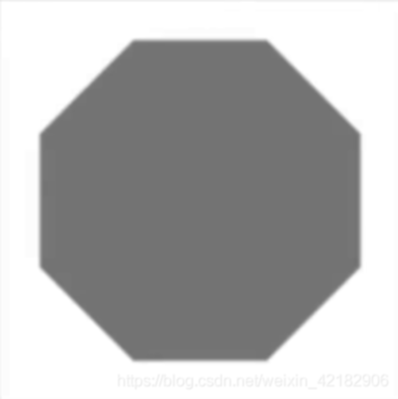

In [ ]:
#applying a smoothing function to smooth the function prior to calculating the derviatives
s_img = cv2.GaussianBlur(img, (3, 3), 0)
cv2_imshow(s_img)

Partial Derivatives

(Text(0.5, 1.0, 'gy'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

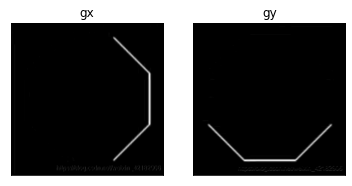

In [ ]:
gx = cv2.Sobel(s_img, -1, dx=1, dy=0)
gy = cv2.Sobel(s_img, -1, dx=0, dy=1)

plt.subplot(1, 2, 1)
plt.imshow(gx, cmap='gray')
plt.title('gx'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2)
plt.imshow(gy, cmap='gray')
plt.title('gy'), plt.xticks([]), plt.yticks([])
#Credit: https://github.com/lzakharov/ud810/blob/master/2A-L5%20Edge%20detection%20-%20Gradients.ipynb

In [ ]:
#ddepth: The depth of the output image. We set it to CV_16S to avoid overflow.
#ksize: Sobel filter to the source image with the 3x3 kernel size
grad_x = cv2.Sobel(s_img, cv2.CV_16S, 1, 0, ksize=3)
grad_y = cv2.Sobel(s_img, cv2.CV_16S, 0, 1, ksize=3)

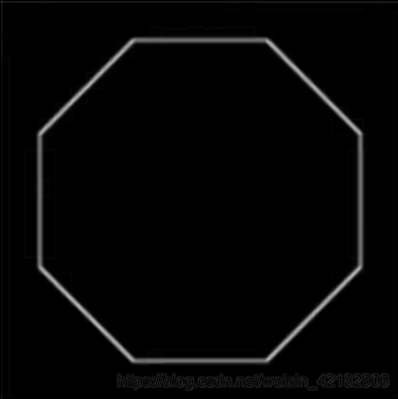

In [ ]:
#convertScaleAbs: On each element of the input array, the function performs three operations sequentially:
# scaling, taking an absolute value, conversion to an unsigned 8-bit type
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)  
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
cv2_imshow(grad) #gradient magnitude